#### Loading the required libraries: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset: 

In [2]:
past_data=pd.read_csv('INNHotelsGroup_pastdata.csv')
new_data=pd.read_csv('INNHotelsGroup_newdata.csv')

In [3]:
past_data.shape

(27093, 12)

In [4]:
new_data.shape

(3583, 11)

In [6]:
past_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  27093 non-null  object 
 1   lead_time                   27093 non-null  int64  
 2   market_segment_type         27093 non-null  object 
 3   no_of_special_requests      27093 non-null  int64  
 4   avg_price_per_room          27093 non-null  float64
 5   no_of_adults                27093 non-null  int64  
 6   no_of_weekend_nights        27093 non-null  int64  
 7   arrival_date                27093 non-null  object 
 8   required_car_parking_space  27093 non-null  int64  
 9   no_of_week_nights           27093 non-null  int64  
 10  booking_status              27093 non-null  object 
 11  rebooked                    8857 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.5+ MB


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  3583 non-null   object 
 1   lead_time                   3583 non-null   int64  
 2   market_segment_type         3583 non-null   object 
 3   no_of_special_requests      3583 non-null   int64  
 4   avg_price_per_room          3583 non-null   float64
 5   no_of_adults                3583 non-null   int64  
 6   no_of_weekend_nights        3583 non-null   int64  
 7   arrival_date                3583 non-null   object 
 8   required_car_parking_space  3583 non-null   int64  
 9   no_of_week_nights           3583 non-null   int64  
 10  booking_status              3583 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 308.0+ KB


### Descriptive Statistics

In [5]:
past_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


In [6]:
past_data.describe(include=object).T

,count,unique,top,freq
booking_id,27093,27093,INNHG_101034,1
market_segment_type,27093,2,Online,18456
arrival_date,27093,439,2021-03-19,279
booking_status,27093,2,Not Canceled,18236
rebooked,8857,2,No,7092


In [8]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,3583.0,92.921295,73.538050,0.0,28.00,81.00,146.0,346.0
no_of_special_requests,3583.0,0.837845,0.836892,0.0,0.00,1.00,1.0,5.0
avg_price_per_room,3583.0,121.608049,36.899246,0.0,96.05,118.65,143.0,300.0
no_of_adults,3583.0,1.998046,0.530738,0.0,2.00,2.00,2.0,4.0
no_of_weekend_nights,3583.0,0.967904,0.908934,0.0,0.00,1.00,2.0,7.0
required_car_parking_space,3583.0,0.057494,0.232816,0.0,0.00,0.00,0.0,1.0
no_of_week_nights,3583.0,2.306726,1.575382,0.0,1.00,2.00,3.0,17.0


In [9]:
new_data.describe(include=object).T

,count,unique,top,freq
booking_id,3583,3583,INNHG_131709,1
market_segment_type,3583,2,Online,3105
arrival_date,3583,51,2022-07-01,111
booking_status,3583,2,Not Canceled,2383


#### Correlation Analysis: Heat Map

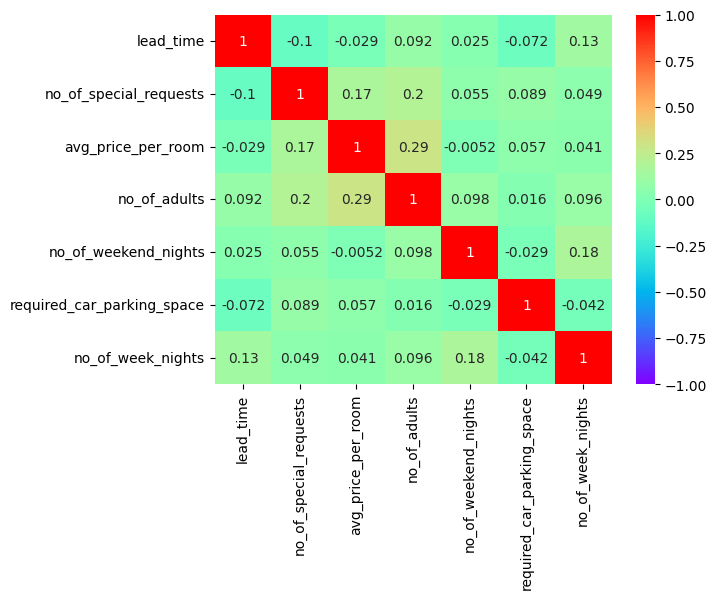

In [10]:
sns.heatmap(past_data.corr(numeric_only=True),annot=True,vmax=1,vmin=-1,cmap='rainbow')
plt.show()

In [13]:
# Removing target variable of new_data and saving it seperately

actual_y = new_data['booking_status']

new_data.drop(columns='booking_status',inplace=True)

##### Merging past_data and new_data for pre processing: 

In [14]:
# concating past and new data for pre-processing
data = pd.concat([past_data,new_data],axis=0)

In [15]:
data

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No
...,...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,NaN,NaN
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,NaN,NaN
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,NaN,NaN
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,NaN,NaN


In [16]:
# We need to assign correct data types to variable

past_data.dtypes

booking_id                     object
lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
rebooked                       object
dtype: object

In [18]:
# Changing the format of arrival data to 'date-time' from object.

data['arrival_date'] = pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [19]:
data.dtypes

booking_id                            object
lead_time                              int64
market_segment_type                   object
no_of_special_requests                 int64
avg_price_per_room                   float64
no_of_adults                           int64
no_of_weekend_nights                   int64
arrival_date                  datetime64[ns]
required_car_parking_space             int64
no_of_week_nights                      int64
booking_status                        object
rebooked                              object
dtype: object

In [20]:
#### Extracting Features from data

In [21]:
data['arrival_day'] = data['arrival_date'].dt.day

data['arrival_month'] = data['arrival_date'].dt.month

data['arrival_weekday'] = data['arrival_date'].dt.weekday

In [22]:
data

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked,arrival_day,arrival_month,arrival_weekday
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN,1,1,4
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN,1,1,4
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN,1,1,4
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN,1,1,4
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,NaN,NaN,29,9,3
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,NaN,NaN,29,9,3
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,NaN,NaN,29,9,3
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,NaN,NaN,29,9,3


In [23]:
# Dropping irrelevent variable from data: 

data.drop(columns=['booking_id','arrival_date'],inplace=True)

In [24]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,rebooked,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,NaN,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,NaN,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,NaN,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,NaN,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,No,1,1,4


### Data Analysis

In [25]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'rebooked', 'arrival_day', 'arrival_month', 'arrival_weekday'],
      dtype='object')

In [26]:
num_cols=['lead_time','avg_price_per_room','arrival_day']

cat_cols=['market_segment_type','no_of_special_requests','no_of_adults','no_of_weekend_nights','required_car_parking_space',
         'no_of_week_nights','booking_status','rebooked','arrival_month','arrival_weekday']

#### Univatriate Analysis

In [27]:
# Number Columns

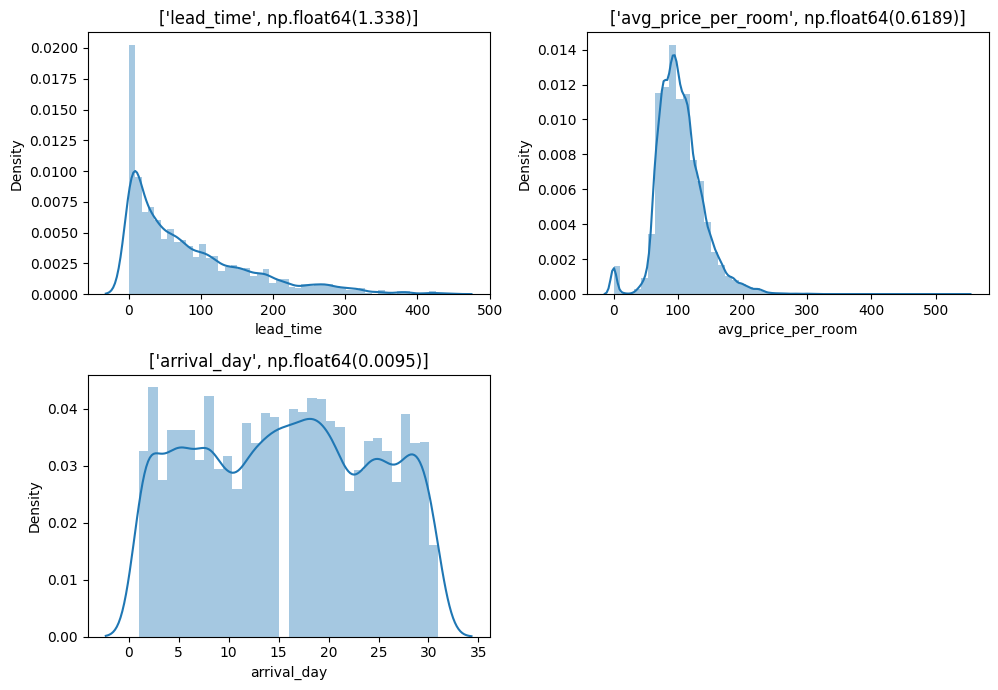

In [28]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    plt.title([i,round(data[i].skew(),4)])
    t+=1
plt.tight_layout()
plt.show()

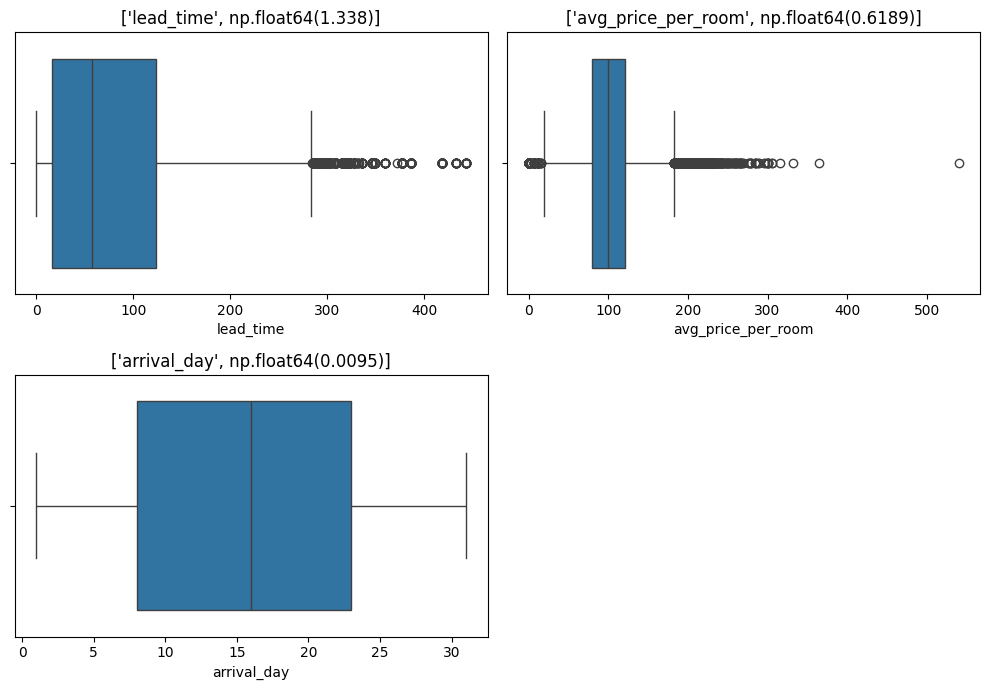

In [29]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i],orient='h')
    plt.title([i,round(data[i].skew(),4)])
    t+=1
plt.tight_layout()
plt.show()

In [30]:
# Category Columns

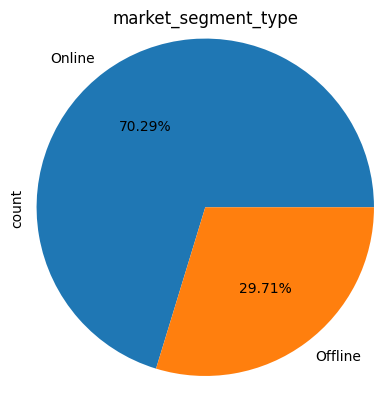

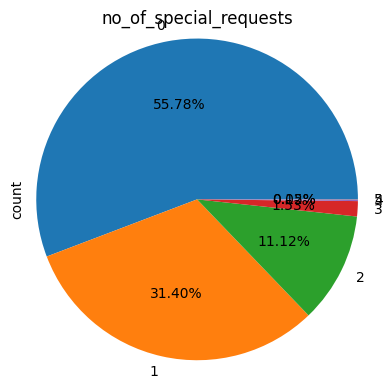

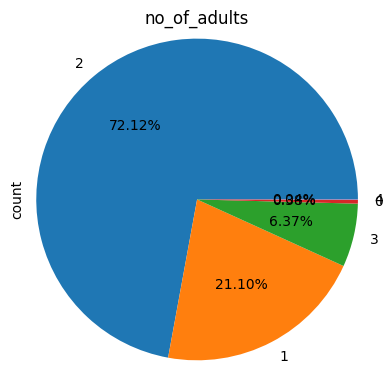

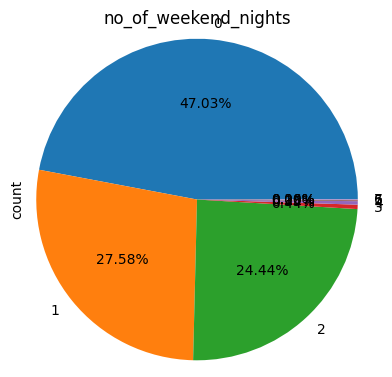

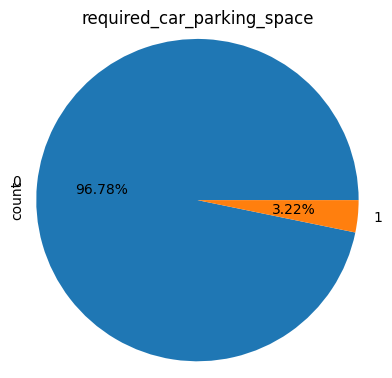

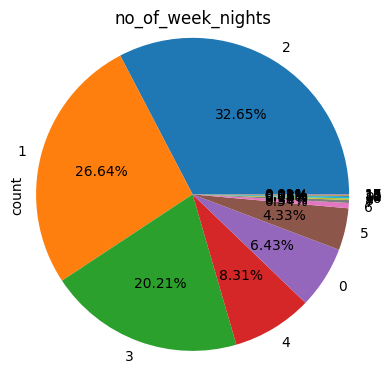

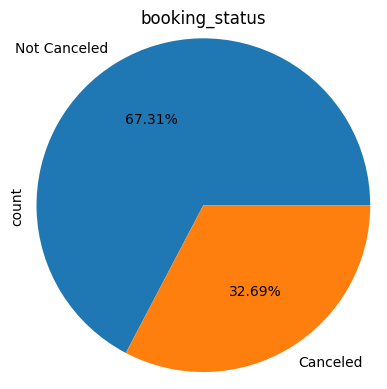

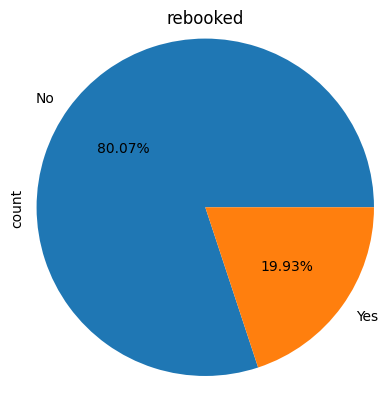

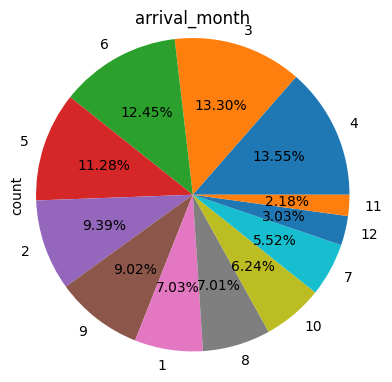

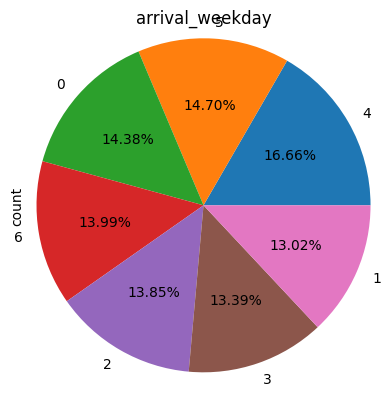

In [40]:
for i in cat_cols:
    plt.figure(figsize=(4,4))
    data[i].value_counts().plot(kind='pie',autopct='%.2f%%',radius=1.2)
    plt.tight_layout()
    plt.title(i)
    plt.show()

In [41]:
### Inferences: 

In [42]:
# Let's Explore 'rebooked' data

In [43]:
data.groupby(by=['booking_status','rebooked'])['rebooked'].count()

booking_status  rebooked
Canceled        No          7092
                Yes         1765
Name: rebooked, dtype: int64

<Axes: xlabel='booking_status'>

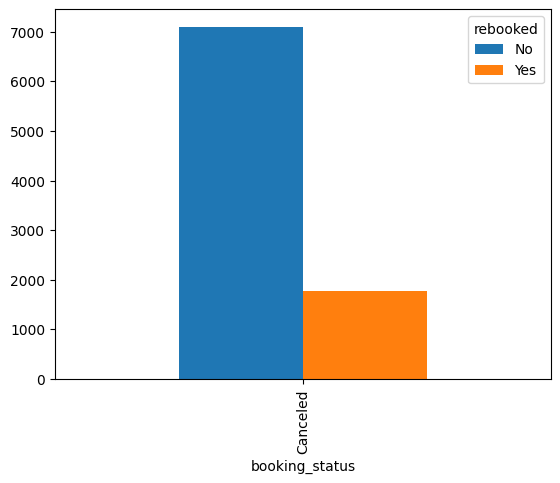

In [44]:
pd.crosstab(data['booking_status'],data['rebooked']).plot(kind='bar')

## Bi-Variate Analysis

In [45]:
# Num Vs Category(Target)

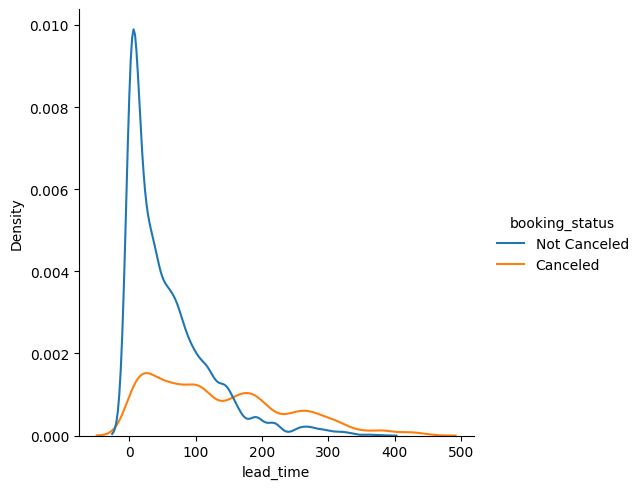

In [46]:
sns.displot(x=data['lead_time'],kind='kde',hue=data['booking_status'])

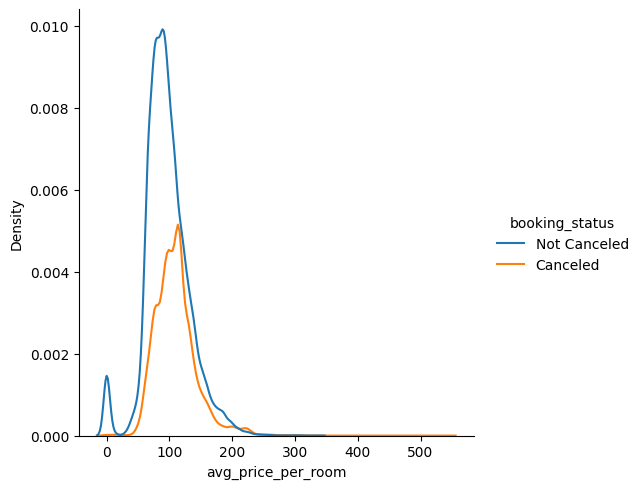

In [47]:
sns.displot(x=data['avg_price_per_room'],kind='kde',hue=data['booking_status'])

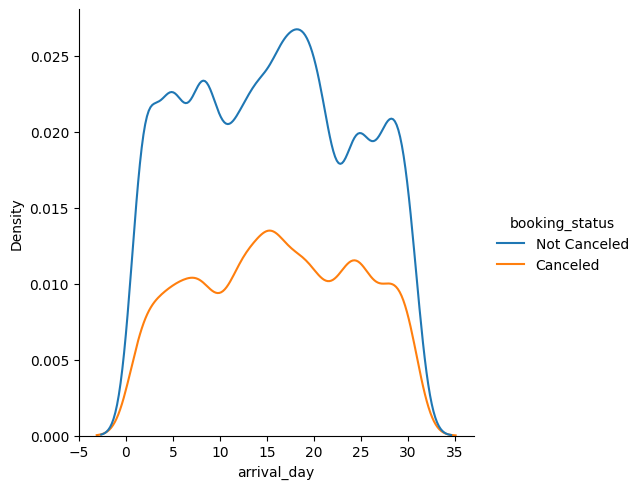

In [48]:
sns.displot(x=data['arrival_day'],kind='kde',hue=data['booking_status'])

In [49]:
# Category Vs Category(Target)
# Grouped Bar Plot
cat_cols

['market_segment_type',
 'no_of_special_requests',
 'no_of_adults',
 'no_of_weekend_nights',
 'required_car_parking_space',
 'no_of_week_nights',
 'booking_status',
 'rebooked',
 'arrival_month',
 'arrival_weekday']

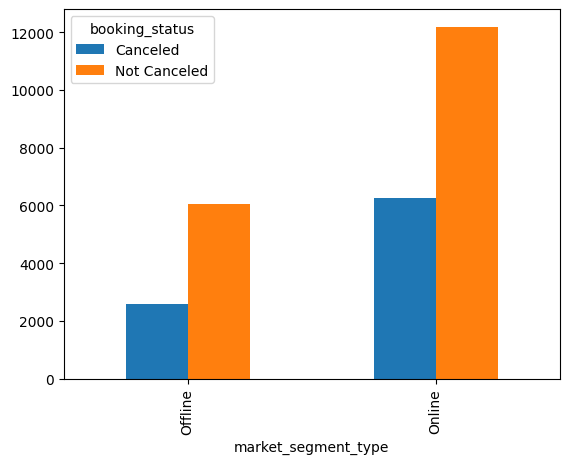

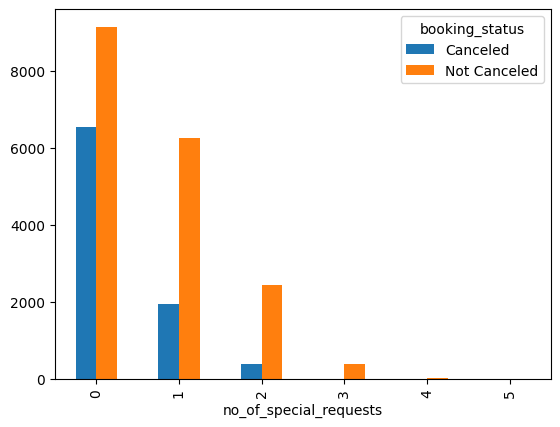

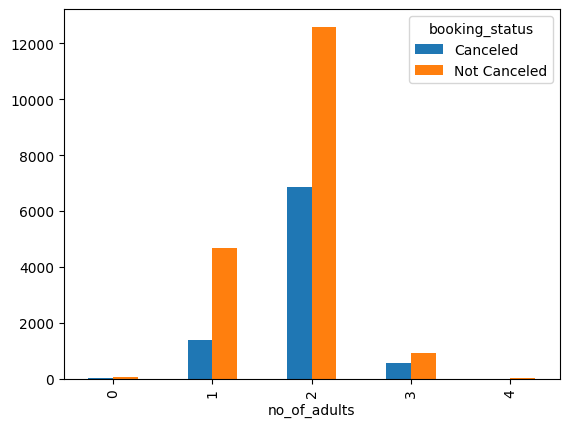

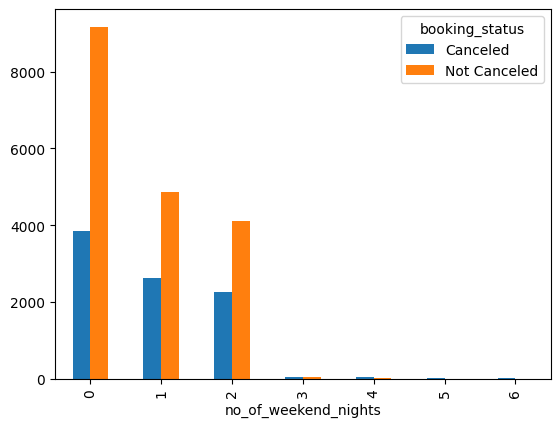

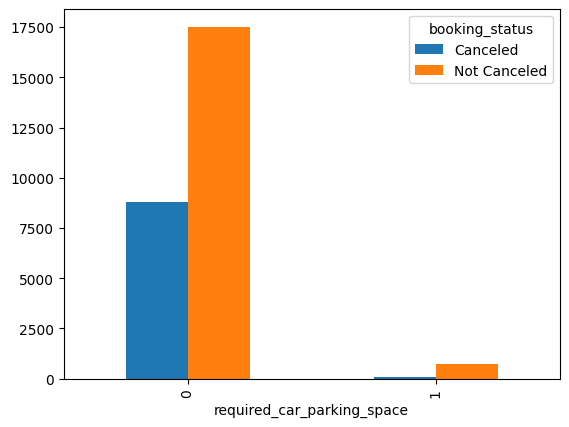

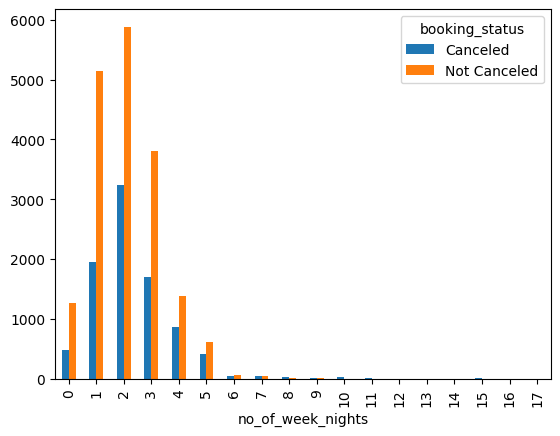

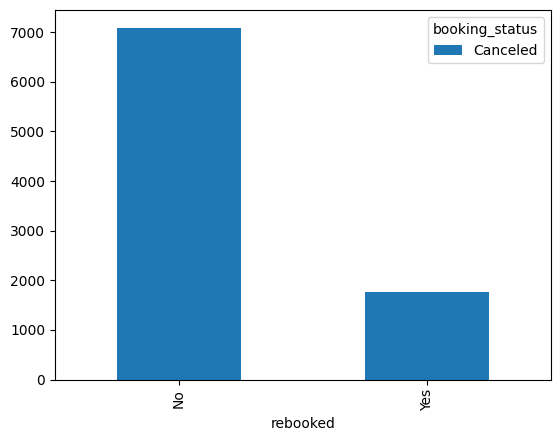

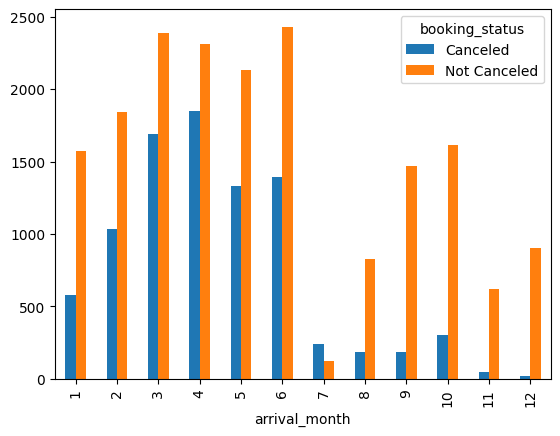

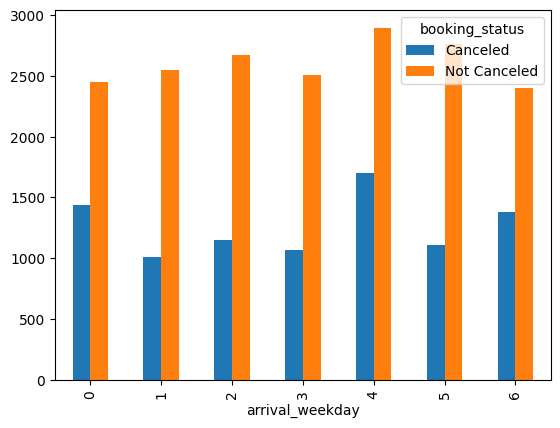

In [50]:
for i in cat_cols:
    if i !='booking_status':
        pd.crosstab(data[i],data['booking_status']).plot(kind='bar')
        plt.show()

## Statistical Analysis (Inferential Statistics)

In [51]:
# Num Vs Cat

In [52]:
import scipy.stats as stats

In [53]:
num_cols

['lead_time', 'avg_price_per_room', 'arrival_day']

In [54]:
# Two Sample t-test/ Mann-Whitney Yu
# Ho: There is no relation between Num col and Booking Status (mu1 = mu2)
# Ha: There is a relation between Num col and Booking Status (mu1 != mu2)

In [55]:
# Assumptions (Normality)
print(stats.shapiro(data['lead_time']))
print(stats.shapiro(data['avg_price_per_room']))
print(stats.shapiro(data['arrival_day']))

ShapiroResult(statistic=np.float64(0.8581100362370457), pvalue=np.float64(1.6046032230860855e-94))
ShapiroResult(statistic=np.float64(0.9544858842942514), pvalue=np.float64(1.2687469208316678e-68))
ShapiroResult(statistic=np.float64(0.9569492666827937), pvalue=np.float64(1.8290120643615932e-67))


In [56]:
for i in num_cols:
    print(stats.shapiro(data[i]))

ShapiroResult(statistic=np.float64(0.8581100362370457), pvalue=np.float64(1.6046032230860855e-94))
ShapiroResult(statistic=np.float64(0.9544858842942514), pvalue=np.float64(1.2687469208316678e-68))
ShapiroResult(statistic=np.float64(0.9569492666827937), pvalue=np.float64(1.8290120643615932e-67))


In [57]:
for i in num_cols:
    samp1=data[data['booking_status']=='Not Canceled'][i]
    samp2=data[data['booking_status']=='Canceled'][i]
    print(stats.mannwhitneyu(samp1,samp2))

MannwhitneyuResult(statistic=np.float64(40528570.5), pvalue=np.float64(0.0))
MannwhitneyuResult(statistic=np.float64(61814361.0), pvalue=np.float64(4.950381137183313e-216))
MannwhitneyuResult(statistic=np.float64(77648486.5), pvalue=np.float64(2.5710270847504093e-07))


In [58]:
# Since all the p-values are less then 0.05,
# We reject the Ho, i.e. there is a relation between num cols and booking status

In [59]:
# Cat Vs Cat (Chi-square contingency)

# Ho: Categories have no relation
# Ha: Categories have a relation

In [60]:
for i in cat_cols:
    if i!='booking_status':
        table=pd.crosstab(data[i],data['booking_status'])
        print(f'{i}(P-value): {stats.chi2_contingency(table)[1]}')

market_segment_type(P-value): 7.806389643886697e-11
no_of_special_requests(P-value): 0.0
no_of_adults(P-value): 1.4411855115006094e-73
no_of_weekend_nights(P-value): 5.324997086476798e-43
required_car_parking_space(P-value): 5.626905783478662e-49
no_of_week_nights(P-value): 7.318602549508705e-65
rebooked(P-value): 1.0
arrival_month(P-value): 0.0
arrival_weekday(P-value): 2.0528217585454624e-36


In [61]:
# Except rebooked, all other categories are showing significant relation with the target (booking status) column

## Data Preprocessing

In [62]:
# We cannot include rebooking feature in model as this information is only available when the booking has been canceled,
# Which we have to predict
data.drop(columns='rebooked',inplace=True)

In [63]:
data

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3578,258,Online,1,106.20,2,0,0,1,NaN,29,9,3
3579,263,Online,0,100.30,2,2,0,4,NaN,29,9,3
3580,185,Online,2,116.10,2,2,0,3,NaN,29,9,3
3581,214,Online,0,120.90,2,0,0,3,NaN,29,9,3


In [64]:
train=data[data['booking_status'].notnull()]
test=data[data['booking_status'].isnull()]

In [65]:
train.shape

(27093, 12)

In [66]:
test.shape

(3583, 12)

#### Missing Values

In [67]:
train.isnull().sum()

lead_time                     0
market_segment_type           0
no_of_special_requests        0
avg_price_per_room            0
no_of_adults                  0
no_of_weekend_nights          0
required_car_parking_space    0
no_of_week_nights             0
booking_status                0
arrival_day                   0
arrival_month                 0
arrival_weekday               0
dtype: int64

In [69]:
# There are no missing values

#### Outlier Teeatment

In [70]:
# Remove/cap the outliers
for i in num_cols:
    q1,q3=np.quantile(train[i],[0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+(2.5*iqr),q1-(2.5*iqr)
    train[i]=np.where(train[i]>ul,ul,train[i])
    train[i]=np.where(train[i]<ll,ll,train[i])

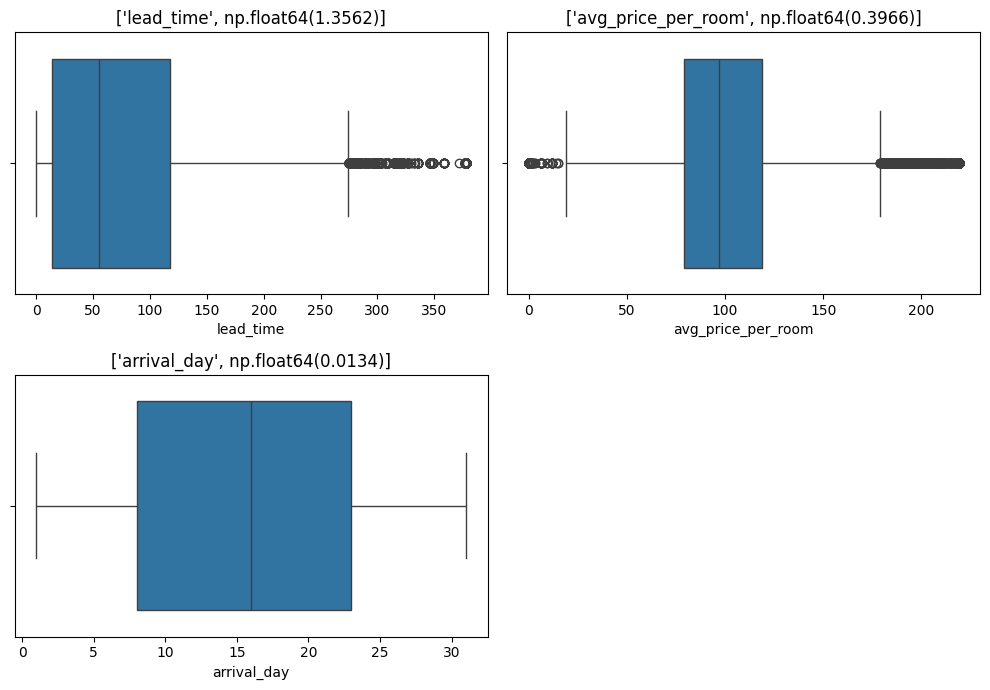

In [71]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=train[i],orient='h')
    plt.title([i,round(train[i].skew(),4)])
    t+=1
plt.tight_layout()
plt.show()

#### Encoding

In [72]:
# We have to use .map() to encode booking status in train instead of .get_dummies() 
# as .get_dummies() is encoding Canceled as 0. But we need Canceled to be encoded as '1'

# No need to encode booking status in test as we don't need it and all the values are nan.
# get_dummies will automatically drop booking status from test.

In [73]:
train['booking_status']=train['booking_status'].map({'Canceled':1,'Not Canceled':0})
train=pd.get_dummies(train,drop_first=True,dtype=int)
test=pd.get_dummies(test,drop_first=True,dtype=int)

In [74]:
train.shape

(27093, 12)

In [75]:
test.shape

(3583, 11)

## Train-Test Split

In [76]:
x_test=test
y_test=actual_y.map({'Canceled':1,'Not Canceled':0})
x_train=train.drop(columns='booking_status')
y_train=train['booking_status']

In [77]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27093, 11) (27093,) (3583, 11) (3583,)


## Predictive Modeling

In [78]:
#pip install xgboost

In [79]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier

from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [80]:
mod=[]
accu=[]
prec=[]
rec=[]
f1=[]
kappa=[]

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    pred_s=m.predict_proba(xtest)[:,1]
    
    print(f'Confusion Matrix\n {confusion_matrix(ytest,pred_h)}')
    print(f'Classification Report\n {classification_report(ytest,pred_h)}')
    
    fpr,tpr,thresh=roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()
    
    response=input('Do you want to save the model Y/N?')
    
    if response.lower()=='y':
        
        global scorecard
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        kappa.append(cohen_kappa_score(ytest,pred_h))

        scorecard=pd.DataFrame({'Model':mod,
                                'Accuracy':accu,
                                'Precision':prec,
                                'Recall':rec,
                                'F1-Score':f1,
                                'Cohen-Kappa Score':kappa})
    else:
        return

#### Logistic Regression

Confusion Matrix
 [[2176  207]
 [ 595  605]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.91      0.84      2383
           1       0.75      0.50      0.60      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.71      0.72      3583
weighted avg       0.77      0.78      0.76      3583



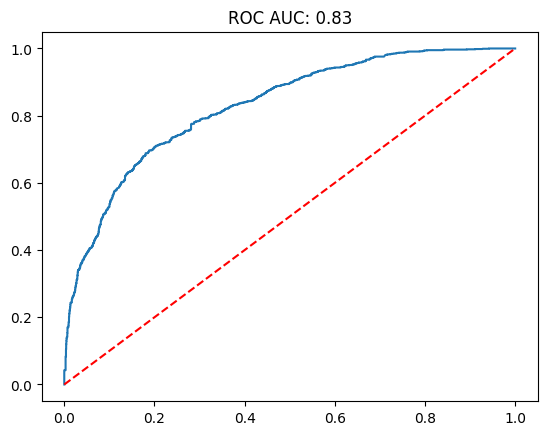

Do you want to save the model Y/N? Y


In [82]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [83]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715


#### Naive Bayes

Confusion Matrix
 [[1917  466]
 [ 518  682]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      2383
           1       0.59      0.57      0.58      1200

    accuracy                           0.73      3583
   macro avg       0.69      0.69      0.69      3583
weighted avg       0.72      0.73      0.72      3583



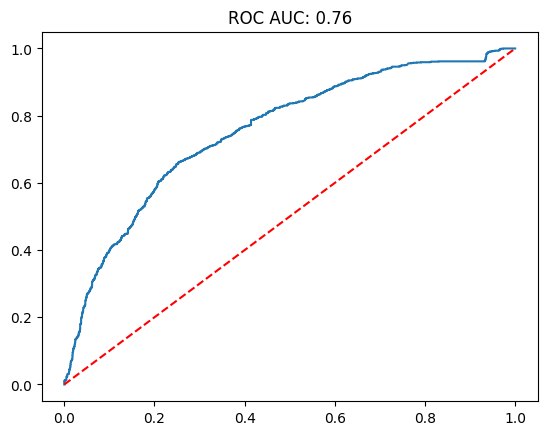

Do you want to save the model Y/N? Y


In [84]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

In [85]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835


#### Decision Tree

Confusion Matrix
 [[2158  225]
 [ 355  845]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      2383
           1       0.79      0.70      0.74      1200

    accuracy                           0.84      3583
   macro avg       0.82      0.80      0.81      3583
weighted avg       0.84      0.84      0.84      3583



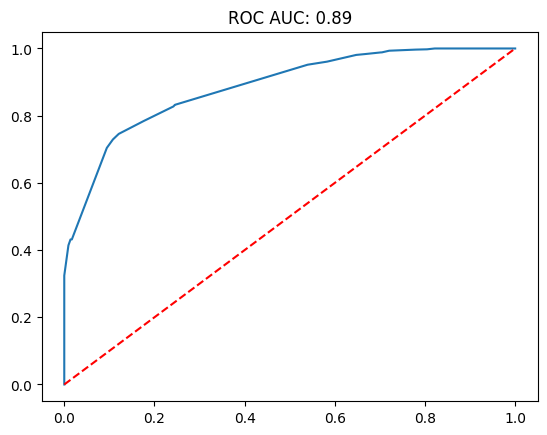

Do you want to save the model Y/N? Y


In [86]:
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

In [87]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597


#### Bagging Classifier/ Random Forest

Confusion Matrix
 [[2156  227]
 [ 346  854]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2383
           1       0.79      0.71      0.75      1200

    accuracy                           0.84      3583
   macro avg       0.83      0.81      0.82      3583
weighted avg       0.84      0.84      0.84      3583



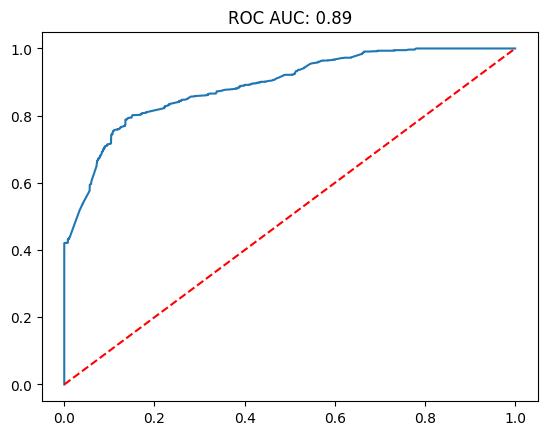

Do you want to save the model Y/N? Y


In [88]:
model_validation(RandomForestClassifier(n_estimators=150,max_features=11,max_depth=5),x_train,y_train,x_test,y_test)

In [89]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790009,0.711667,0.748794,0.631964


#### Ada Boost

Confusion Matrix
 [[2118  265]
 [ 466  734]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2383
           1       0.73      0.61      0.67      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.75      0.76      3583
weighted avg       0.79      0.80      0.79      3583



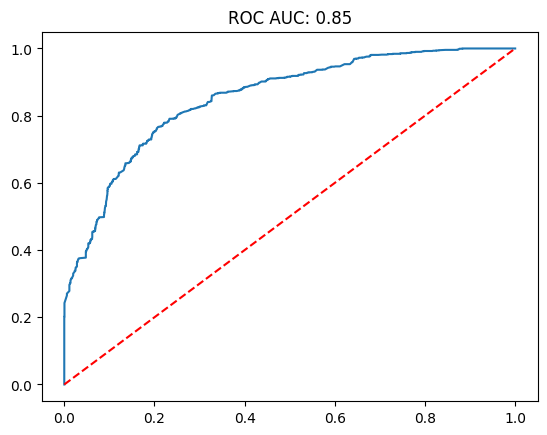

Do you want to save the model Y/N? Y


In [90]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),x_train,y_train,x_test,y_test)

In [91]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790009,0.711667,0.748794,0.631964
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172


#### Gradient Boosting

Confusion Matrix
 [[1875  508]
 [ 279  921]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      2383
           1       0.64      0.77      0.70      1200

    accuracy                           0.78      3583
   macro avg       0.76      0.78      0.76      3583
weighted avg       0.79      0.78      0.78      3583



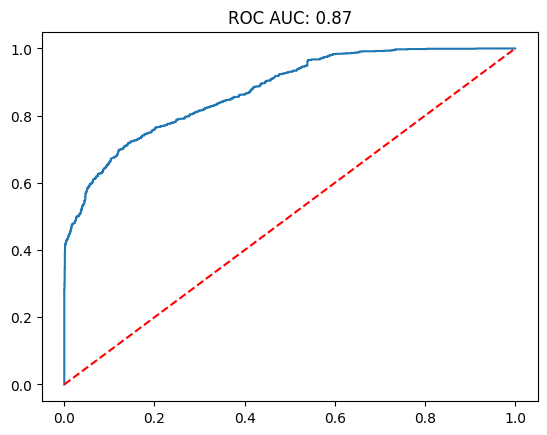

Do you want to save the model Y/N? Y


In [92]:
model_validation(GradientBoostingClassifier(max_depth=7,n_estimators=100),x_train,y_train,x_test,y_test)

In [93]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790009,0.711667,0.748794,0.631964
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172
5,GradientBoostingClassifier(max_depth=7),0.780352,0.644507,0.767500,0.700647,0.529254


#### XGBoost

Confusion Matrix
 [[1786  597]
 [ 271  929]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.75      0.80      2383
           1       0.61      0.77      0.68      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.76      0.74      3583
weighted avg       0.78      0.76      0.76      3583



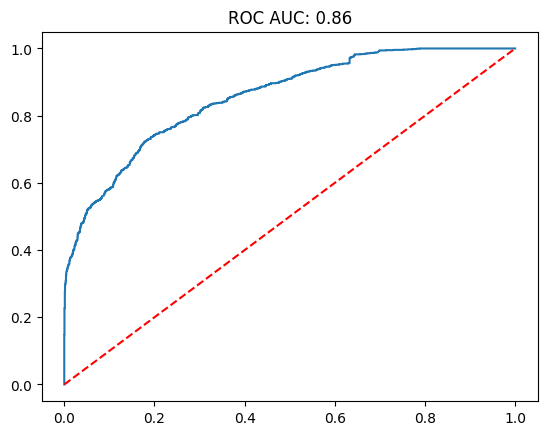

Do you want to save the model Y/N? Y


In [94]:
model_validation(XGBClassifier(n_estimators=250,max_depth=7,learning_rate=0.1),x_train,y_train,x_test,y_test)

In [95]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790009,0.711667,0.748794,0.631964
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172
5,GradientBoostingClassifier(max_depth=7),0.780352,0.644507,0.767500,0.700647,0.529254
6,"XGBClassifier(base_score=None, booster=None, c...",0.757745,0.608781,0.774167,0.681585,0.490562


#### Voting

In [96]:
base_estimators=[('Decision Tree',DecisionTreeClassifier(max_depth=7)),
                 ('Random Forest',RandomForestClassifier(n_estimators=150,max_depth=5)),
                ('XGBoost',XGBClassifier(n_estimators=200,max_depth=5))]

In [97]:
vc=VotingClassifier(estimators=base_estimators,voting='soft')

In [98]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(max_depth=7)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fals...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

Confusion Matrix
 [[2172  211]
 [ 341  859]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      2383
           1       0.80      0.72      0.76      1200

    accuracy                           0.85      3583
   macro avg       0.83      0.81      0.82      3583
weighted avg       0.84      0.85      0.84      3583



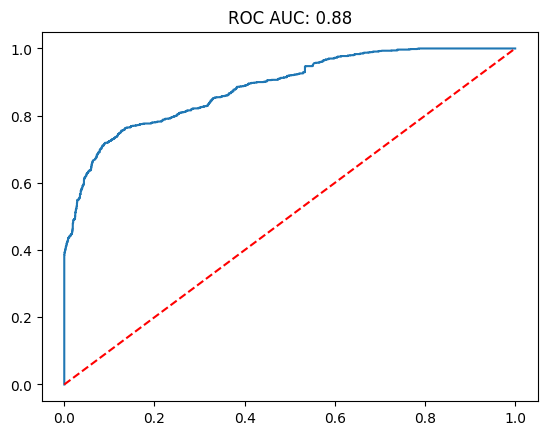

Do you want to save the model Y/N? Y


In [99]:
model_validation(VotingClassifier(estimators=base_estimators,voting='soft'),x_train,y_train,x_test,y_test)

In [100]:
base_estimators2=[('Decision Tree1',DecisionTreeClassifier(max_depth=7)),
                  ('Decision Tree2',DecisionTreeClassifier(max_depth=5)),
                 ('Random Forest',RandomForestClassifier(n_estimators=150,max_depth=5)),
                  ('Random Forest2',RandomForestClassifier(n_estimators=200,max_depth=7)),
                ('XGBoost',XGBClassifier(n_estimators=200,max_depth=5))]

In [101]:
vc=VotingClassifier(estimators=base_estimators2,voting='soft')

In [102]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Decision Tree1',
                              DecisionTreeClassifier(max_depth=7)),
                             ('Decision Tree2',
                              DecisionTreeClassifier(max_depth=5)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('Random Forest2',
                              RandomForestClassifier(max_depth=7,
                                                     n_estimators=200)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            col...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

Confusion Matrix
 [[2193  190]
 [ 353  847]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2383
           1       0.82      0.71      0.76      1200

    accuracy                           0.85      3583
   macro avg       0.84      0.81      0.82      3583
weighted avg       0.85      0.85      0.85      3583



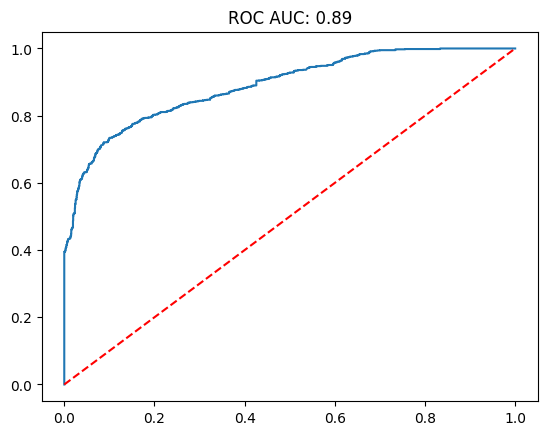

Do you want to save the model Y/N? Y


In [103]:
model_validation(VotingClassifier(estimators=base_estimators2,voting='soft'),x_train,y_train,x_test,y_test)

#### Stacking

In [104]:
sc=StackingClassifier(estimators=base_estimators2,final_estimator=DecisionTreeClassifier(max_depth=5),cv=7)

In [105]:
sc.fit(x_train,y_train)

StackingClassifier(cv=7,
                   estimators=[('Decision Tree1',
                                DecisionTreeClassifier(max_depth=7)),
                               ('Decision Tree2',
                                DecisionTreeClassifier(max_depth=5)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=150)),
                               ('Random Forest2',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=200)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=N...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=DecisionTreeClassifier(max_depth=5))

Confusion Matrix
 [[2265  118]
 [ 568  632]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      2383
           1       0.84      0.53      0.65      1200

    accuracy                           0.81      3583
   macro avg       0.82      0.74      0.76      3583
weighted avg       0.81      0.81      0.79      3583



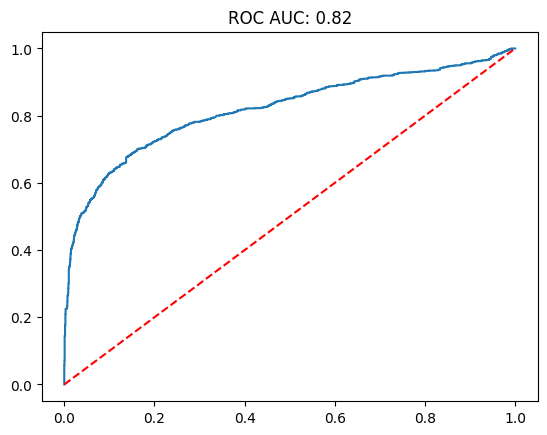

Do you want to save the model Y/N? Y


In [106]:
model_validation(StackingClassifier(estimators=base_estimators2,cv=7),
                x_train,y_train,x_test,y_test)

In [107]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(),0.776165,0.745074,0.504167,0.601392,0.453715
1,GaussianNB(),0.725370,0.594077,0.568333,0.580920,0.376835
2,DecisionTreeClassifier(max_depth=5),0.838124,0.789720,0.704167,0.744493,0.626597
3,"RandomForestClassifier(max_depth=5, max_featur...",0.840078,0.790009,0.711667,0.748794,0.631964
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.795981,0.734735,0.611667,0.667576,0.522172
5,GradientBoostingClassifier(max_depth=7),0.780352,0.644507,0.767500,0.700647,0.529254
6,"XGBClassifier(base_score=None, booster=None, c...",0.757745,0.608781,0.774167,0.681585,0.490562
7,"VotingClassifier(estimators=[('Decision Tree',...",0.845939,0.802804,0.715833,0.756828,0.644623
8,VotingClassifier(estimators=[('Decision Tree1'...,0.848451,0.816779,0.705833,0.757264,0.647948
9,"StackingClassifier(cv=7,\n e...",0.808540,0.842667,0.526667,0.648205,0.526121


#### Fine Tuning the Final Model

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param= {'n_estimators':[70,100,120],'max_features':[9,10,11],
       'max_depth':[7,8,9,10]}

In [110]:
gscv=GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=param,scoring='f1',verbose=1,cv=4)

In [111]:
# gscv.fit(x_train,y_train)

In [112]:
# model_validation(RandomForestClassifier(**gscv.best_params),x_train,y_train,x_test,y_test)

In [113]:
final_model=RandomForestClassifier(max_depth=6,max_features=11,n_estimators=150)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=11, n_estimators=150)

In [114]:
pred_h=final_model.predict(x_test)
pred_s=final_model.predict_proba(x_test)[:,1]

In [115]:
# Let's try to find the best cut off classifier using Yodens index
fpr,tpr,thresh=roc_curve(y_test,pred_s)

In [116]:
pd.DataFrame({'FPR':fpr,
              'TPR':tpr,
              'Threshold':thresh,
              'Yodens Index':tpr*(1-fpr)}).sort_values(by='Yodens Index',ascending=False)

,FPR,TPR,Threshold,Yodens Index
294,0.142677,0.812500,0.332657,0.696575
292,0.142258,0.811667,0.339957,0.696201
295,0.143517,0.812500,0.331429,0.695893
293,0.142677,0.811667,0.336282,0.695860
297,0.145615,0.814167,0.328011,0.695612
...,...,...,...,...
939,0.952581,1.000000,0.000979,0.047419
940,0.989929,1.000000,0.000800,0.010071
941,0.997063,1.000000,0.000755,0.002937
0,0.000000,0.000000,inf,0.000000


In [117]:
pred_h=(pred_s>0.331522).astype(int)

In [118]:
print(classification_report(y_test,pred_h))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2383
           1       0.74      0.81      0.78      1200

    accuracy                           0.84      3583
   macro avg       0.82      0.83      0.83      3583
weighted avg       0.85      0.84      0.84      3583



## Prediction

In [119]:
x_train.head(2)

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday,market_segment_type_Online
0,0.0,0,85.03,1,1,0,0,1.0,1,4,1
1,34.0,2,125.10,2,2,0,0,1.0,1,4,1


In [120]:
final_model.predict([[10,1,77,2,2,0,1,4,6,1,1]])

array([0])

In [121]:
final_model.predict_proba([[10,1,77,2,2,0,1,4,6,1,1]])[:,1]

array([0.15334681])

## Deployment

In [122]:
# Let's save this model

In [123]:
import pickle

In [124]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)
                                                # .pkl is the extension of a pickle file
                                                # 'wb' is mode of opening file in binary write mode